**Project - IronHack Payments**

In [59]:
import pandas as pd


In [60]:
cash_request = pd.read_csv('project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('project_dataset/extract - fees - data analyst - .csv')


In [61]:
cash_df = cash_request
display(cash_df)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [62]:
#1 created a copy
cohort_df = cash_df.copy()

#2 'send_at' in dataTime
cash_df['send_at'] = pd.to_datetime(cash_df['send_at'], format='mixed', errors='coerce')

In [63]:
#3 Remove the lines 'send_at' (NaN)
cohort_df = cohort_df[cohort_df['send_at'].notna()]

In [64]:
print(cohort_df['send_at'].dtype)

object


In [ ]:
# 1. Crie uma cópia do DataFrame original
cohort_df = cash_df.copy()

# 2. Converta a coluna 'send_at' para datetime (com tratamento de erros)
cohort_df['send_at'] = pd.to_datetime(cohort_df['send_at'], errors='coerce')

# 3. Remova linhas onde 'send_at' não pôde ser convertido
cohort_df = cohort_df[cohort_df['send_at'].notna()]

# 4. Crie colunas auxiliares: 'order_month' e 'cohort_month'
cohort_df['order_month'] = cohort_df['send_at'].dt.to_period('M')
cohort_df['cohort_month'] = cohort_df.groupby('user_id')['send_at'].transform('min').dt.to_period('M')

# 5. Calcule a diferença em meses entre a data da transação e a primeira transação do usuário
cohort_df['cohort_index'] = (
    (cohort_df['order_month'].dt.year - cohort_df['cohort_month'].dt.year) * 12 +
    (cohort_df['order_month'].dt.month - cohort_df['cohort_month'].dt.month) + 1
)
merged_df = merged_df.rename(columns={'cohort_month': 'cohort'})


# 6. Crie a tabela de cohort (usuários únicos por mês desde o início de cada cohort)
cohort_pivot = cohort_df.groupby(['cohort_month', 'cohort_index'])['user_id'].nunique().unstack(fill_value=0)

# 7. Exiba a tabela final
display(cohort_pivot)


C:\Users\vinyj\AppData\Local\Temp\ipykernel_12400\3025006028.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cohort_df['order_month'] = cohort_df['send_at'].dt.to_period('M')
C:\Users\vinyj\AppData\Local\Temp\ipykernel_12400\3025006028.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cohort_df['cohort_month'] = cohort_df.groupby('user_id')['send_at'].transform('min').dt.to_period('M')


cohort_index,1,2,3,4,5
cohort_month,,,,,
2020-07,361,220,148,170,2
2020-08,2263,1114,1203,42,0
2020-09,1186,553,27,0,0
2020-10,5719,48,0,0,0
2020-11,168,0,0,0,0


In [66]:
!pip install matplotlib seaborn

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

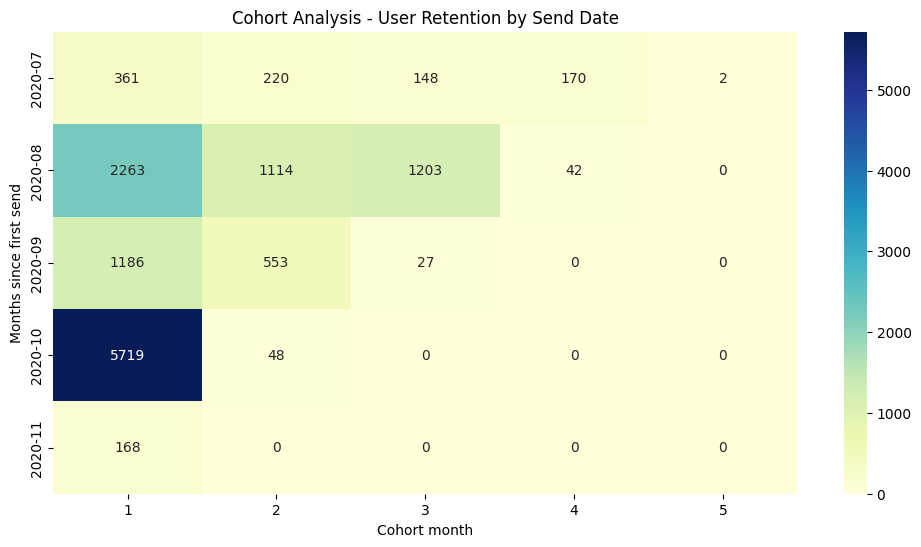

In [68]:
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Cohort Analysis - User Retention by Send Date')
plt.ylabel('Months since first send')
plt.xlabel('Cohort month')
plt.show()


In [69]:
fees_df_copy = fees

In [70]:
# Dropping the duplicates in the fees DataFrame
fees_df = fees.drop_duplicates(subset= 'cash_request_id')

In [71]:
print(fees_df['cash_request_id'].duplicated().sum())

0


In [72]:
# merging tables

merged_df = cash_df.merge(
    fees_df,
    how='left',
    left_on='id',            # or whatever the key is in cash_df
    right_on='cash_request_id' #or whatever it is in fees_df
)


In [73]:
print(merged_df.columns)

Index(['id_x', 'amount', 'status_x', 'created_at_x', 'updated_at_x', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'id_y', 'cash_request_id', 'type', 'status_y', 'category',
       'total_amount', 'reason', 'created_at_y', 'updated_at_y', 'paid_at',
       'from_date', 'to_date', 'charge_moment'],
      dtype='object')


In [74]:
print(cash_request['status'].unique())

['rejected' 'money_back' 'canceled' 'active' 'direct_debit_rejected'
 'transaction_declined' 'direct_debit_sent']


In [77]:
incidents = merged_df.groupby(['cohort', 'type']).size().unstack(fill_value=0)


KeyError: 'cohort'

In [ ]:
incidents.head

NameError: name 'incidents' is not defined